#About

This notebook presents example of using DataPopularityEstimator and DataAccessPredictor in DataPopulaity module

#Data requets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_path = 'Data/popularity-728days.xls'
data = pd.read_excel(data_path)
#data = data[data['Storage']=='Disk']

data.irow(range(0,2))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631


###Data columns requests

In [2]:
data.columns

Index([u'Name', u'Configuration', u'ProcessingPass', u'FileType', u'Type', u'Creation-week', u'NbLFN', u'LFNSize', u'NbDisk', u'DiskSize', u'NbTape', u'TapeSize', u'NbArchived', u'ArchivedSize', u'Nb Replicas', u'Nb ArchReps', u'Storage', u'FirstUsage', u'LastUsage', u'Now', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, ...], dtype='object')

#DataPopularityEstimator

###Train Data Popularity Estimator

In [3]:
from datapop import DataPopularityEstimator

estimator = DataPopularityEstimator(data=data, nb_of_weeks=104)

#Alternative way:
#estimator = DataPopularityEstimator(source_path=data_path, nb_of_weeks=104)

/home/mikhail91/Documents/REP/REP/rep_core/rep/data/storage.py:14: UserWarning: The data processing pipeline is unstable and it's probably will be changed in the future.
  "it's probably will be changed in the future.", UserWarning)


In [4]:
%%time
estimator.train()

KFold prediction using folds column
CPU times: user 3min 8s, sys: 687 ms, total: 3min 9s
Wall time: 3min 10s


1

0.96367243668930236

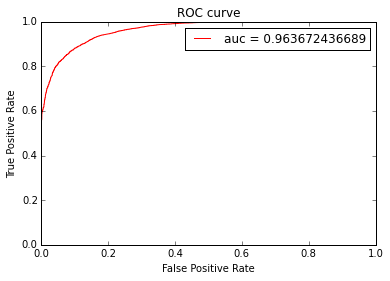

In [5]:
estimator.roc_curve()

In [6]:
estimator.train_report.irow(range(0,5))

,Name,Probability,Label
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.058208,0
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.926440,0
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.955519,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.019168,0
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.917046,1


###Get Popularity

In [7]:
popularity = estimator.get_popularity()
popularity.irow(range(0,5))

,Name,Popularity,Label
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000201,0
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.370173,0
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.428257,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000157,0
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.356201,1


###Cut Popularity

In [8]:
cut = estimator.popularity_cut_fpr(fpr_value=0.02)
cut

0.28035078368588839

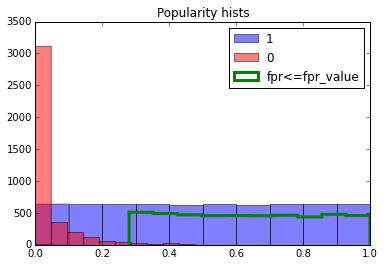

In [9]:
pop = estimator.get_popularity()['Popularity'].values
label = estimator.train_report['Label'].values

plt.hist(pop[label==1], color='b', alpha=0.5, label='1')
plt.hist(pop[label==0], color='r', alpha=0.5, label='0')
plt.hist(pop[pop>=cut], color='g', alpha=1, label='fpr<=fpr_value', histtype='step', linewidth=3)
plt.legend(loc='best')
plt.title('Popularity hists')
plt.show()

#DataAccessPredictor

The DataAccessPredictor uses Nadaraya-Watson method for the first smoothing of time series. 
Then, rolling mean method with an adaptive window is used for the second smoothing. 
Last points of the smoothed time series are used as predict values.

###Get prediction

In [10]:
from datapop import DataIntensityPredictor

predictor = DataIntensityPredictor(data=data, nb_of_weeks=104)

In [11]:
%%time
prediction = predictor.predict(zero_one_scale=True)

CPU times: user 1min 59s, sys: 47.7 ms, total: 1min 59s
Wall time: 2min


In [12]:
prediction.columns

Index([u'Name', u'Intensity', u'Std_error'], dtype='object')

In [13]:
prediction.irow(range(5))

,Name,Intensity,Std_error
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.707870e-03,0.012686
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,7.185918e-02,0.232858
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000e+00,0.000000
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.359477e-04,0.000000
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.270906e-17,0.000000


###Get curve examples

1

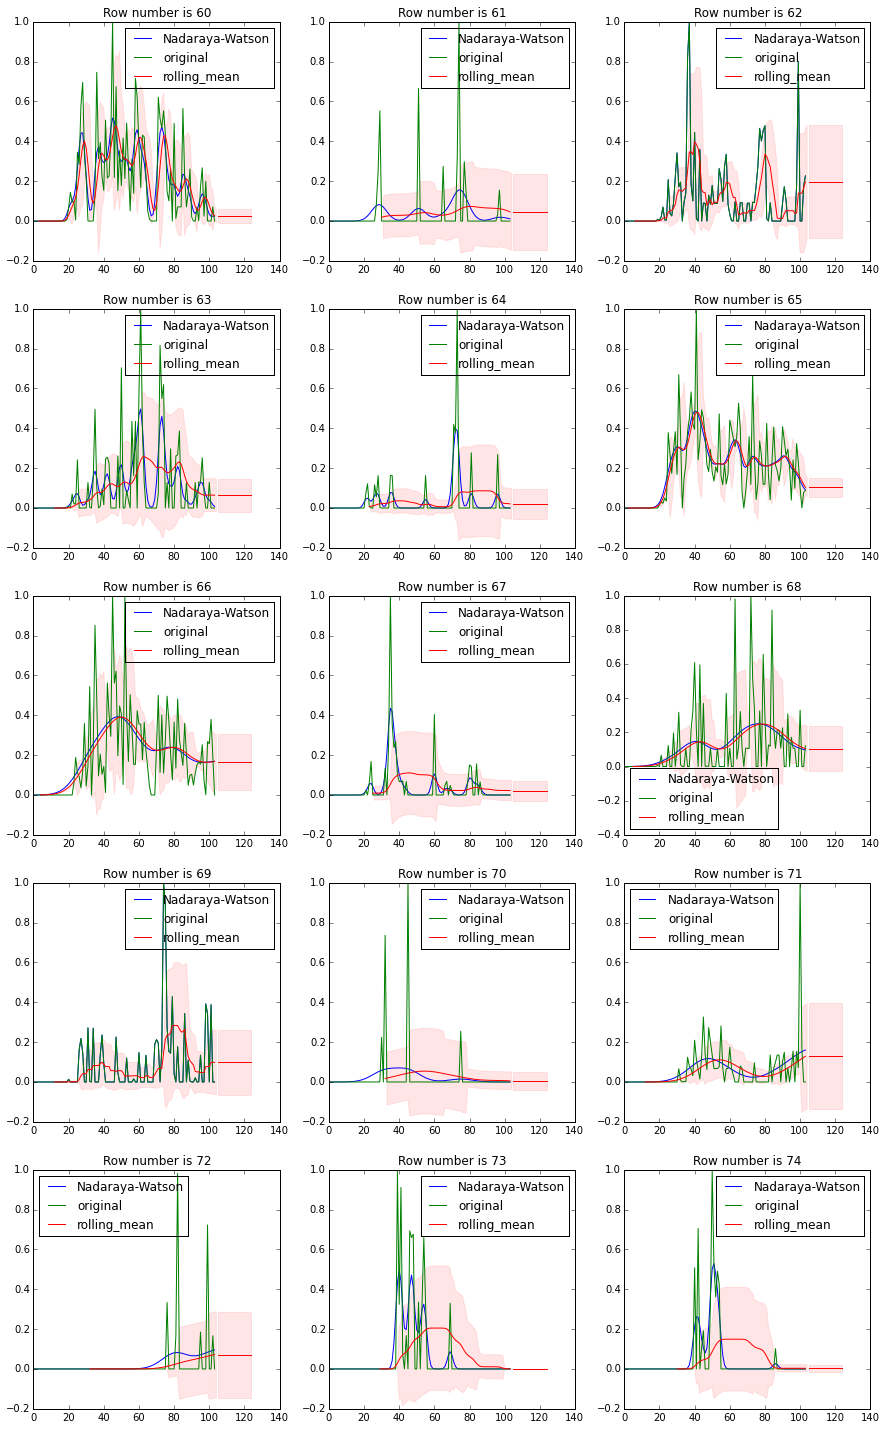

In [14]:
predictor.show_examples(start_row=60, end_row=75)

In [15]:
#The following methon contains all predicted curves.
#y - the original time series
#y_kr - kernel regression curve (Nadaraya-Watson smoothing)
#y_out - rolling mean values curve
#y_std - rolling standart deviation values curve. 

#predictor.predicted_curves[0]['y_kr']

###Popularity and Predicted Accesses correlations

The following histogramms shows, that datasets popularities and predicted accesses are hightly correlated.

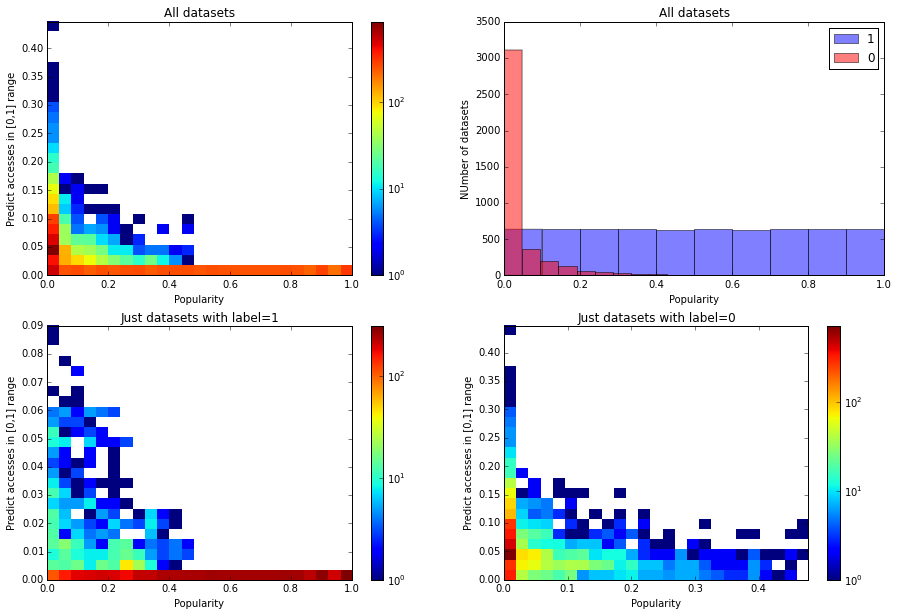

In [16]:
from matplotlib.colors import LogNorm
label = estimator.train_report.sort(columns='Name')['Label'].values
pred = prediction.sort(columns='Name')['Intensity'].values
pop = popularity.sort(columns='Name')['Popularity'].values
#pop = estimator.train_report.sort(columns='Name')['Probability']

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.hist2d(pop, pred, norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('All datasets')

plt.subplot(222)
plt.hist(pop[label==1], color='b', alpha=0.5, label='1')
plt.hist(pop[label==0], color='r', alpha=0.5, label='0')
plt.legend(loc='best')
plt.xlabel('Popularity')
plt.ylabel('NUmber of datasets')
plt.title('All datasets')

plt.subplot(223)
plt.hist2d(pop[label==1], pred[label==1], norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('Just datasets with label=1')

plt.subplot(224)
plt.hist2d(pop[label==0], pred[label==0], norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('Just datasets with label=0')

#DataPlacementOptimizer

DataPlacementOptimizer takes reports of DataPopularityEstimator and DataIntensityPredictor to minimize loss function.

###Reports preparation

In [17]:
estimator_opti = DataPopularityEstimator(data=data, nb_of_weeks=104)
estimator_opti.train()
predictor_opti = DataIntensityPredictor(data=data, nb_of_weeks=104)

popularity_report = estimator_opti.get_popularity()
prediction_report = predictor_opti.predict(zero_one_scale=False)

KFold prediction using folds column


###Get optimal data sets storege placement

In [18]:
from datapop import DataPlacementOptimizer

optimizer = DataPlacementOptimizer(popularity_report, prediction_report, data)

In [39]:
opti_report = optimizer.opti_placement(q=None, set_replicas='auto', c_disk=100, c_tape=1, c_miss=3000, alpha=1, min_replicas=1, max_replicas=4)

In [40]:
opti_report.irow(range(5))

,Name,OnDisk,NbReplicas
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,3
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,4
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,1
7338,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,1


###Plot loss function

Min point is  (0.44, 2774091.8668959392)


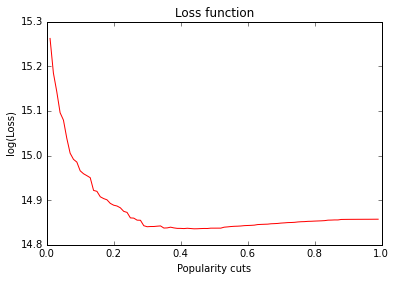

1

In [41]:
optimizer.plot_loss_curve(q=None, set_replicas='auto', c_disk=100, c_tape=1, c_miss=3000, alpha=1, min_replicas=1, max_replicas=4)

###Get distribution of number of replicas on disk

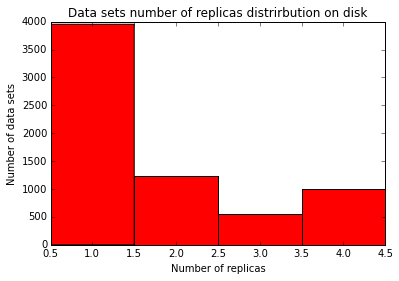

58.7483276349 %  1 replicas
18.2547941133 %  1 replicas
8.22060353798 %  1 replicas
14.7762747138 %  1 replicas


In [42]:
max_replicas = 4
nb_rep = opti_report.NbReplicas[opti_report.OnDisk==1].values
plt.hist(nb_rep, bins=[i+0.5 for i in range(max_replicas+1)])
plt.xlabel('Number of replicas')
plt.ylabel('Number of data sets')
plt.title('Data sets number of replicas distrirbution on disk')
plt.show()
print len(nb_rep[nb_rep==1])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==2])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==3])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==4])/float(len(nb_rep))*100, '%', ' 1 replicas'

###Saving space

In [43]:
total_size_on_disk_before = (data['DiskSize'].values).sum()
total_size_on_disk_after = optimizer.opti_total_size(opti_report)

saving_space = total_size_on_disk_before - total_size_on_disk_after
print 'Total size before = ', total_size_on_disk_before, ' Gb'
print 'Total size after = ', total_size_on_disk_after, ' Gb'
print '___________________'
print 'Saving space = ', saving_space, ' Gb'

Total size before =  10347.966565  Gb
Total size after =  8335.248943  Gb
___________________
Saving space =  2012.717622  Gb


#Performance

In [44]:
from datapop import Performance
performance = Performance(data, popularity_report=popularity_report, prediction_report=prediction_report, report=opti_report)
performance.get_performance_report(t_disk=0.1, t_tape=3, const_tape=24)

,Downloading_time_ratio (train),Saving_space_(%) (train),Nb_of_mistakes (train)
0,0.956397,19.338842,8
